In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud
%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned Reddit Data AS.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data.Title = data.Title.astype(str)
data.head()

,RID,Title,URL,Score,Comment_Score,Author,Content,Adult,Flair,Length_Title,Length_Content
0,g89s9t,Website find getting paid fairly comparing sal...,/r/india/comments/g89s9t/website_to_find_out_i...,2,0,ngranja19,NaN,False,Business/Finance,84,0
1,g89rnl,Happy Akshaya Tritiya Akshaya Trititya 2020 Fe...,/r/india/comments/g89rnl/happy_akshaya_tritiya...,1,0,vaultuptechnologies,removed,False,AskIndia,74,7
2,g89ni7,A new turf war erupted Pakistan sponsored terr...,/r/india/comments/g89ni7/a_new_turf_war_has_er...,8,6,aviakki1,NaN,False,Non-Political,166,0
3,g89j51,Special flights hospital beds Centre preps fly...,/r/india/comments/g89j51/special_flights_hospi...,13,6,silentr3b31,NaN,False,Politics,75,0
4,g89iup,24 Vijayawada contract virus man hosts games h...,/r/india/comments/g89iup/24_in_vijayawada_cont...,65,8,drgnfly61,NaN,False,Coronavirus,50,0


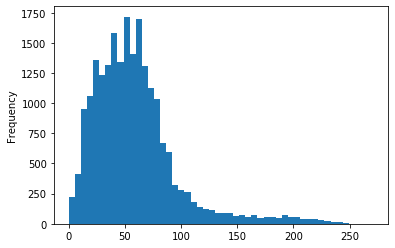

In [3]:
data['Length_Title'].plot(bins=50, kind='hist') 

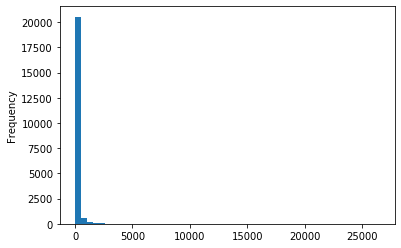

In [4]:
data['Length_Content'].plot(bins=50, kind='hist')

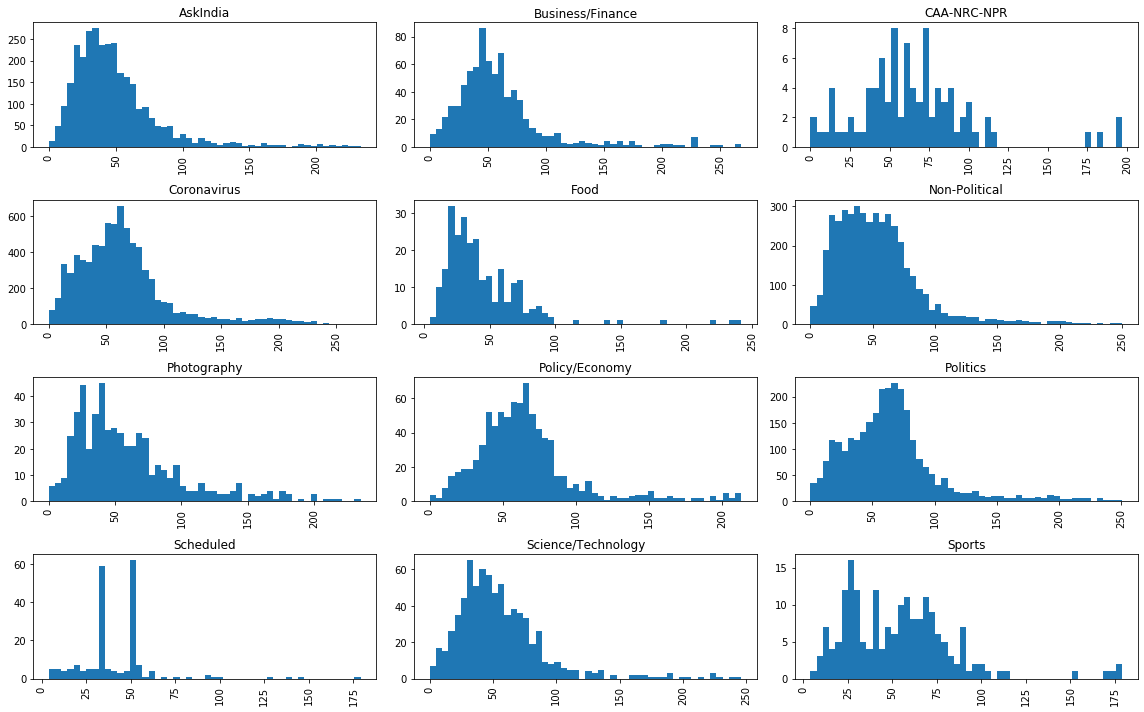

In [5]:
data.hist(column='Length_Title', by='Flair', bins=50,figsize=(16,10))
plt.tight_layout()

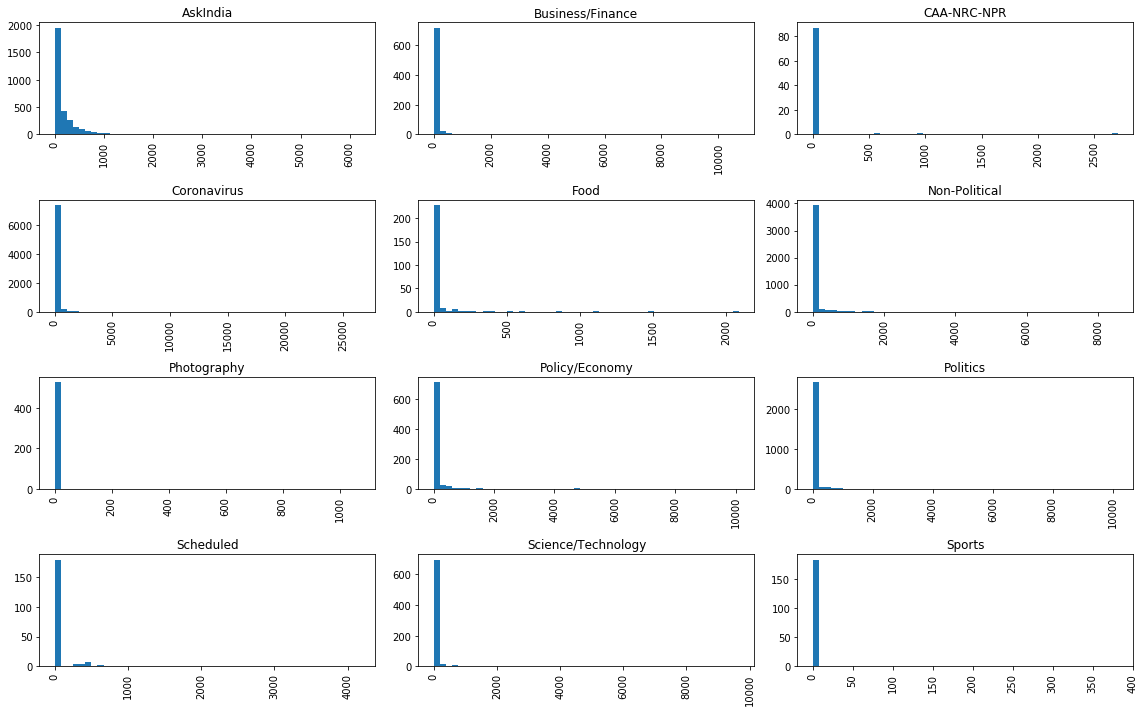

In [6]:
data.hist(column='Length_Content', by='Flair', bins=50,figsize=(16,10))
plt.tight_layout()

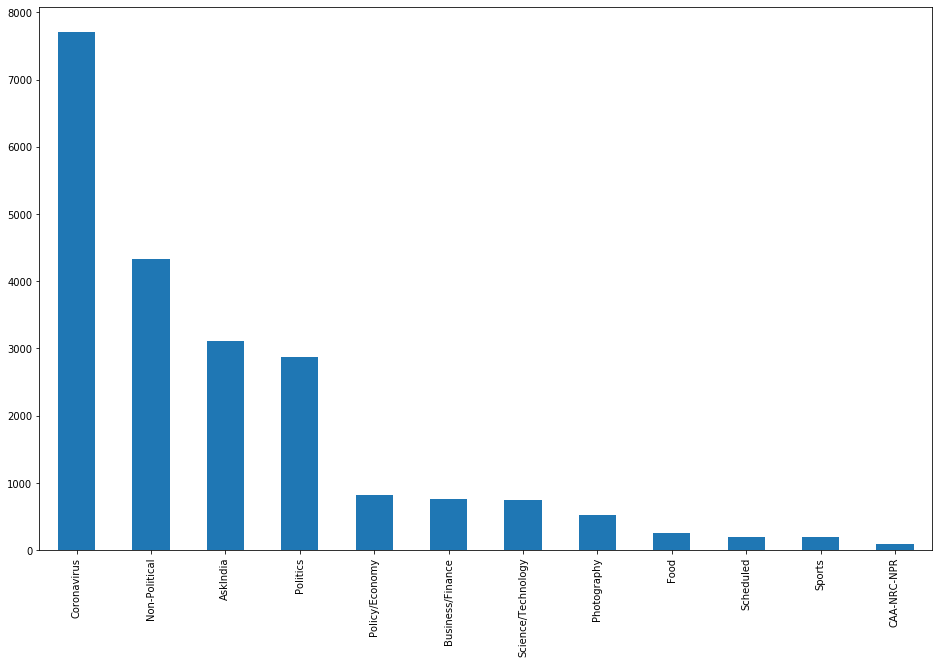

In [7]:
plt.figure(figsize = (16, 10))
data.Flair.value_counts().plot(kind='bar')

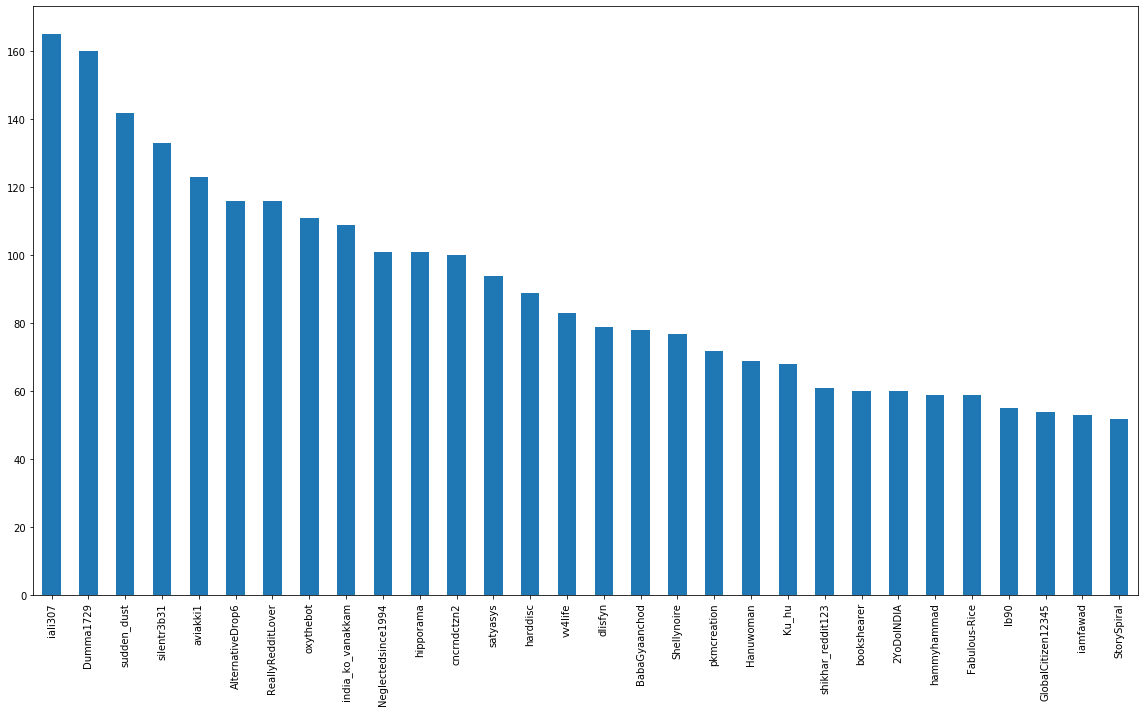

In [8]:
plt.figure(figsize = (16, 10))
data.Author.value_counts().head(30).plot(kind='bar');
plt.tight_layout()

In [9]:
data[data['Author'] == 'iali307']['Flair'].value_counts()

Politics            77
Coronavirus         56
Non-Political       23
Business/Finance     4
CAA-NRC-NPR          2
Policy/Economy       2
Sports               1
Name: Flair, dtype: int64

In [10]:
data['Adult'].value_counts()

False    21478
True       128
Name: Adult, dtype: int64

Text(0.5, 0.98, 'Scores on Flair')

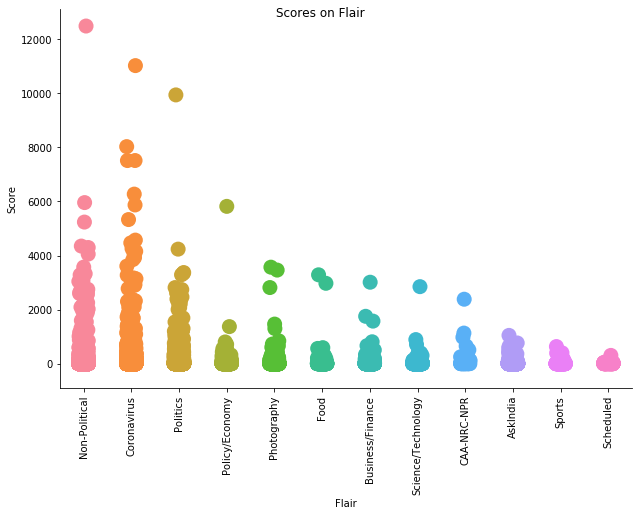

In [11]:
graph = sns.catplot(x='Flair', y='Score', data=data.sort_values(by='Score',ascending=False), kind='strip',s=15,height=6,aspect=1.5)
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Scores on Flair')

In [12]:
alphabet = []
for i in data['Title']:
    for j in i:
        j.strip(" ")
        alphabet.append(j)        

In [13]:
filtered_alphabet = []
for character in alphabet:
    if not character == " ":
        filtered_alphabet.append(character.lower())

In [14]:
count = {}
for i in filtered_alphabet:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1

In [15]:
sortedDictionary = dict(collections.OrderedDict(sorted(count.items())))
print(sortedDictionary)

{'+': 137, '0': 4821, '1': 4928, '2': 3248, '3': 1228, '4': 997, '5': 1313, '6': 629, '7': 658, '8': 717, '9': 3157, '_': 103, 'a': 99248, 'b': 14465, 'c': 43703, 'd': 49315, 'e': 109889, 'f': 14410, 'g': 25767, 'h': 33067, 'i': 95131, 'j': 3744, 'k': 15110, 'l': 47196, 'm': 32604, 'n': 79126, 'o': 75563, 'p': 29529, 'q': 1474, 'r': 70703, 's': 79054, 't': 73288, 'u': 31705, 'v': 17382, 'w': 16825, 'x': 2227, 'y': 17525, 'z': 1288}


In [16]:
word_data = pd.DataFrame({'Alphabet': list(sortedDictionary.keys()), 'Count': list(sortedDictionary.values())})
word_data.head()

,Alphabet,Count
0,+,137
1,0,4821
2,1,4928
3,2,3248
4,3,1228


Text(0.5, 1.0, 'Keyboard frequency')

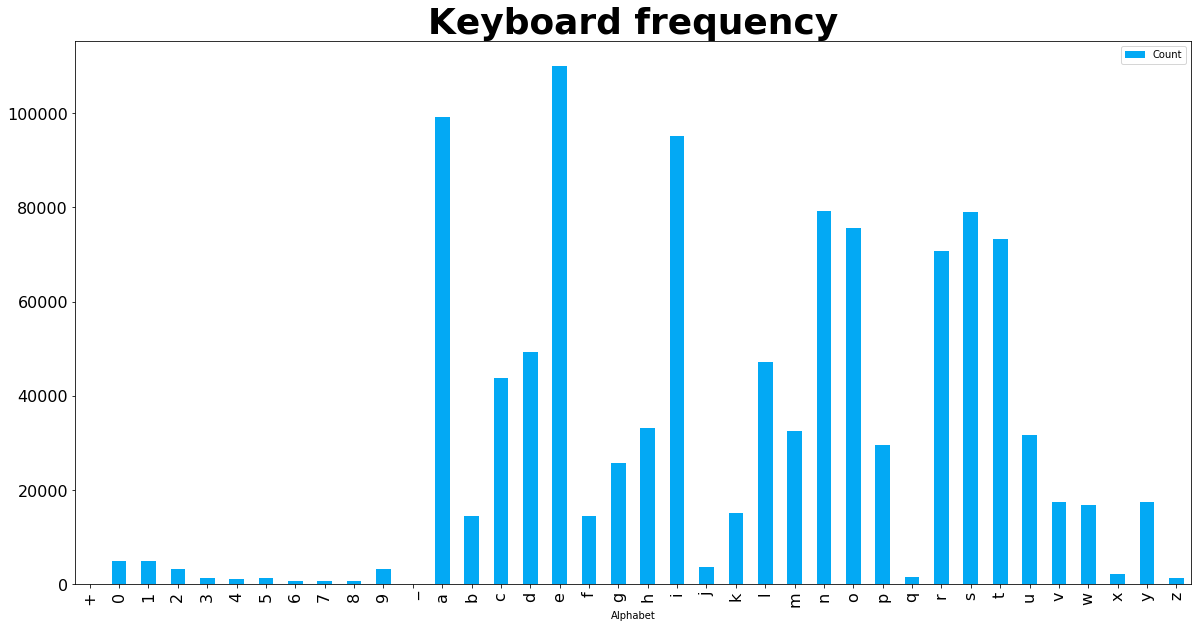

In [17]:
graph = word_data.plot(x = "Alphabet", y = "Count", kind = "bar", figsize = (20,10), color = (0.011, 0.662, 0.956), fontsize = 16)
graph.set_title("Keyboard frequency", fontweight = 'bold', fontsize = 36)

Text(0.5, 1.0, 'Upvotes to Comments')

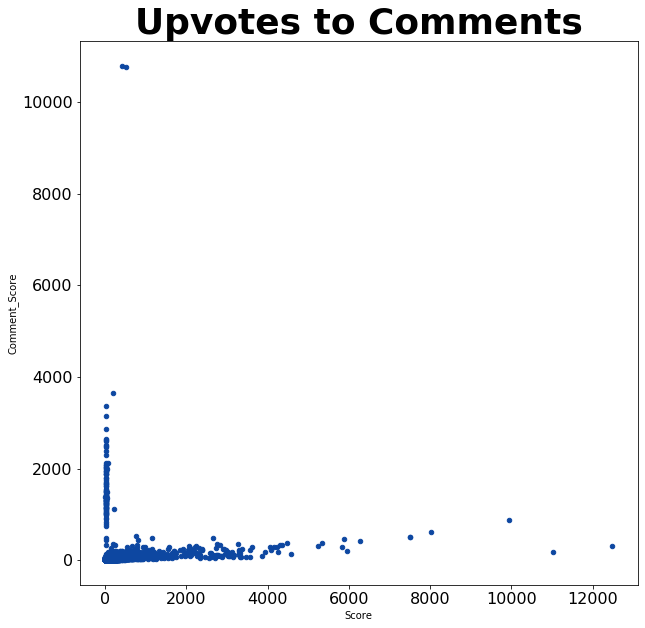

In [18]:
graph_comp = data.plot(figsize = (10,10), kind = "scatter", x = "Score", y = "Comment_Score", color = (0.050, 0.278, 0.631), fontsize = 16)
graph_comp.set_title("Upvotes to Comments", fontweight = 'bold', fontsize = 36)

In [19]:
adult_data = dict(data['Adult'].value_counts())
adult_data = pd.DataFrame({"Label": list(adult_data.keys()), "Count": list(adult_data.values())})

Text(0.5, 1.0, 'Adult Data Rate')

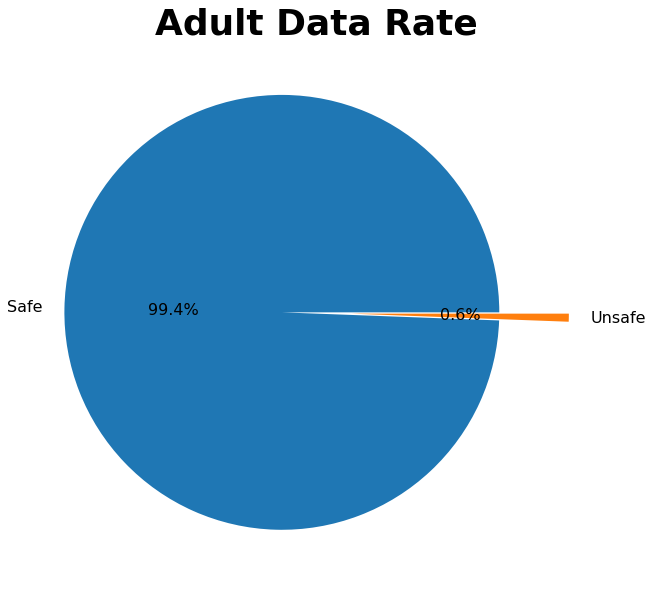

In [22]:
label = ["Safe", "Unsafe"]
explode = (0.16, 0.16)
adult_dataplot = adult_data.plot.pie(legend = 0, label = "", y="Count", figsize = (10, 10), labels = label, explode = explode, autopct = "%1.1f%%" , pctdistance = 0.5, startangle = 0, fontsize = 16)
adult_dataplot.set_title("Adult Data Rate", fontweight = 'bold', fontsize = 36)

In [23]:
text = dict(data['Author'].value_counts().head(30))

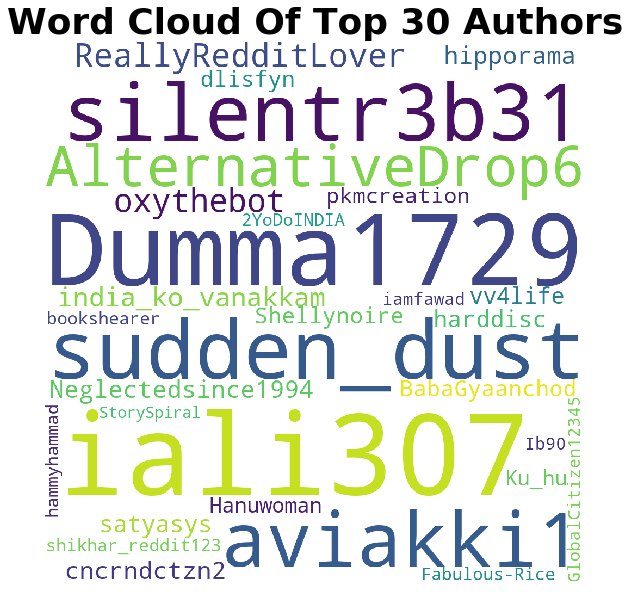

In [24]:
plt.figure(figsize = (16, 10))
cloud = WordCloud(background_color="white",width=1000,height=1000).generate_from_frequencies(text)
plt.axis("off")
plt.title("Word Cloud Of Top 30 Authors", fontweight = 'bold', fontsize = 36)
plt.imshow(cloud)